# Rational B-spline
## Rational B-spline curve
General form of Ratiobal B-spline curve

$$
S(t) = \sum_{i=0}^k{ \frac{N_{i,n}(t)w_i}{ \sum_{j=0}^k {N_{j,n}(t)w_j}  } P_i}
$$

Basis function
$$
N_{i,0}(u) = \left\{ \begin{array}{ll}
    1 & (u_i \leq u < u_{i+1}) \\
    0 & (otherwise)
  \end{array} \right.
$$

$$
N_{i,n}(t) = \frac{u-u_i}{u_{i+n}-u_i}N_{i, n-1}(t) + \frac{u_{i+n+1}-u}{u_{i+n+1}-u_{i+1}}N_{i+1,n-1}(t)
$$


In [5]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [6]:
def open_uniform_vector(m, n):
    u = np.zeros((m, 1), dtype=float)
    j = 1
    for i in range(m):
        if i <= n: 
            u[i] = 0.0
        elif i < m - (n+1): 
            u[i] = 1.0 / (m - 2*(n+1) + 1) * j
            j += 1
        else: 
            u[i] = 1.0 
    return u.flatten()

In [7]:
def basic_function(u, i, n, t):   
    w1 = 0.0
    w2 = 0.0
    if n == 0: 
        if u[i] < t <= u[i+1]:
            var = 1.0
        else:
            var = 0.0;
    else:
        if (u[i+n+1]-u[i+1]) != 0:
            w1 = basic_function(u, i+1, n-1, t) * (u[i+n+1] - t) / (u[i+n+1] - u[i+1])
        if (u[i+n]-u[i]) != 0:  
            w2 = basic_function(u, i, n-1, t)   * (t - u[i])     / (u[i+n] - u[i])        
        var = w1 + w2
    return var

<IPython.core.display.Javascript object>


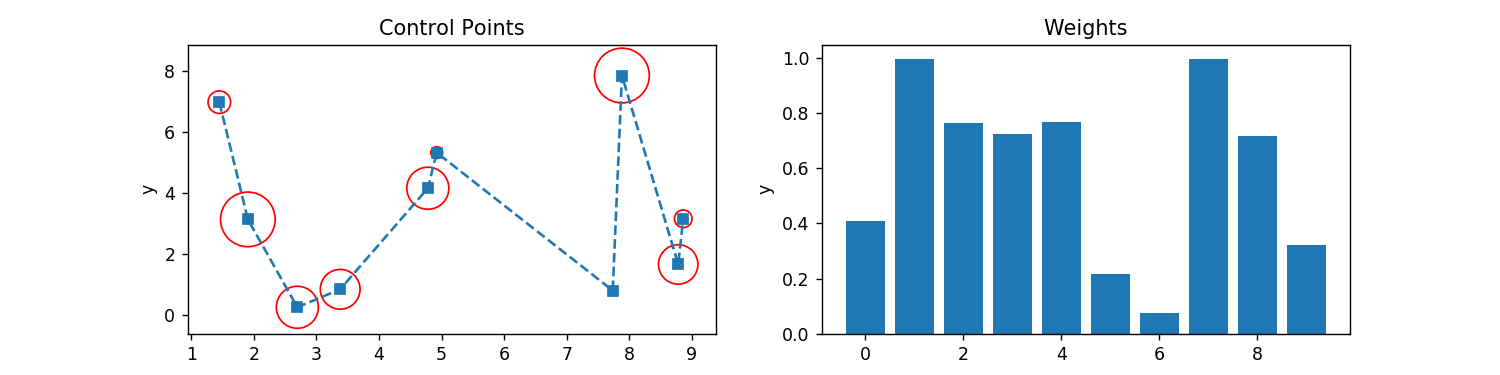

Text(0.5,1,'Weights')

In [8]:
x = sorted([e for e in np.random.rand(10)*10])
y = [e for e in np.random.rand(10)*10]
P = np.array([x,y]) # control points
k = P.shape[1] # number of control points
n = 2 # dgree of B-spline
m = k + n + 1
w = np.random.rand(len(x))#  / len(x) # weights vector

fig = plt.figure("Control Points", figsize = (12, 3))
plt.subplot(121)
plt.plot(P[0, :], P[1, :], "--s")
plt.scatter(P[0, :], P[1, :], s=(w**2.0)*1000, facecolor="none", edgecolor="red")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Control Points")

plt.subplot(122)
plt.bar(range(len(x)) ,w)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Weights")


<IPython.core.display.Javascript object>


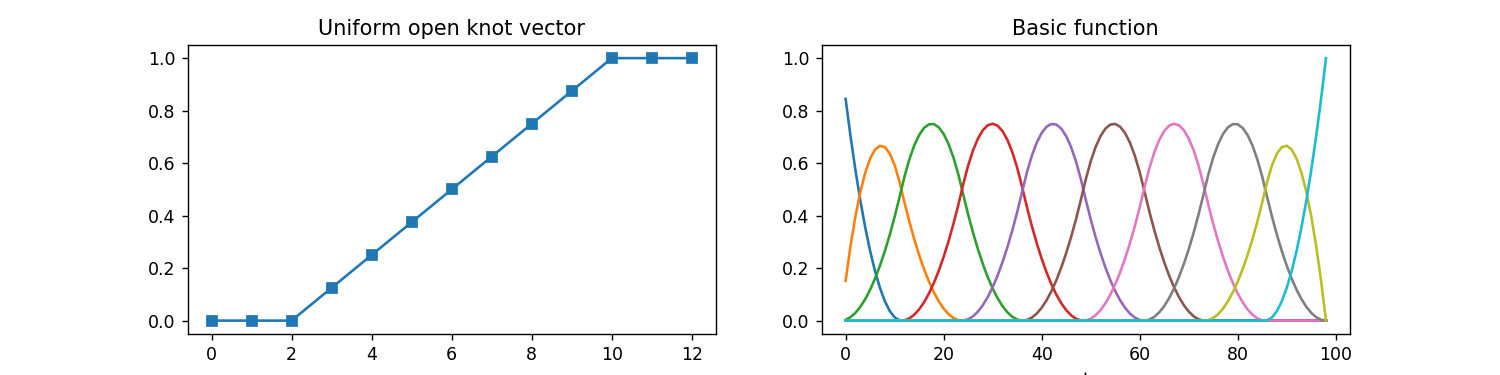

Text(0.5,1,'Basic function')

In [9]:
u = open_uniform_vector(m, n)
t = np.linspace(0.0, u[-1], int(u[-1]/0.01))
fig = plt.figure("knot vector", figsize=(12, 3))
plt.subplot(121)
plt.title("Uniform open knot vector")
plt.plot(u, "-s")

plt.subplot(122)
for j in range(k):
    b = []
    for i in range(len(t)):
        if i==0:
            continue
        b.append(basic_function(u, j, n, t[i]))
    plt.plot(b)
plt.xlabel("t")
plt.title("Basic function")

In [10]:
S = np.zeros((2, len(t)))
S[:, 0] = P[:, 0]

for t_ind in range(len(t)):
    if t_ind==0:
        continue
       
    Nw = 0.0
    for j in range(k):
        Njn = basic_function(u, j, n, t[t_ind])
        Nw = Nw + Njn * w[j]
      
    for i in range(k):
        Nin = basic_function(u, i, n, t[t_ind] )
        Rin = Nin / Nw * w[i]
        S[:, t_ind] = S[:, t_ind] + Rin * P[:, i]    
    

<IPython.core.display.Javascript object>


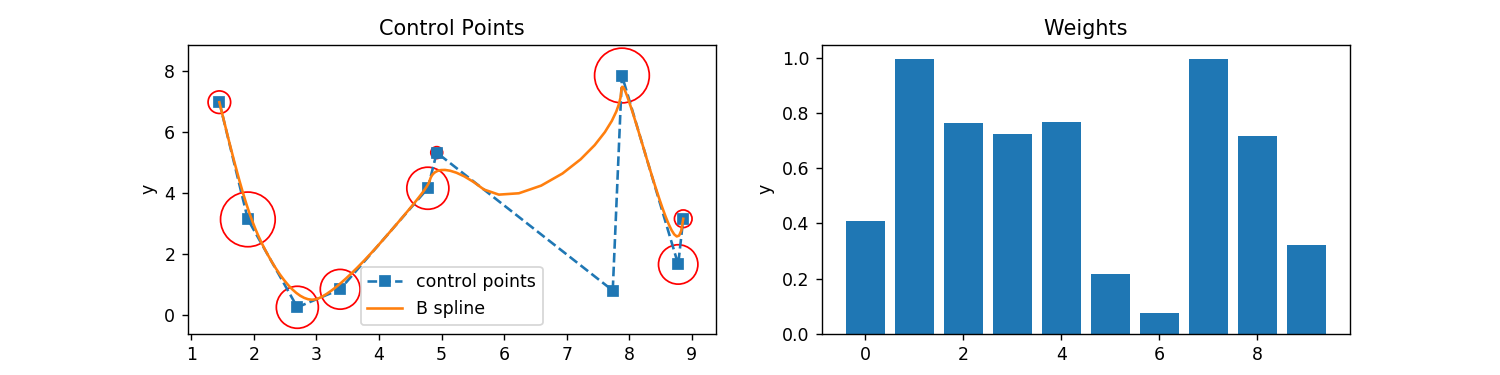

Text(0.5,1,'Weights')

In [11]:
fig = plt.figure("B-spline curve", figsize = (12, 3))
plt.subplot(121)
plt.plot(P[0, :], P[1, :], "--s", label="control points")
plt.scatter(P[0, :], P[1, :], s=(w**2.0)*1000, facecolor="none", edgecolor="red")
plt.plot(S[0, :], S[1, :], "-", label="B spline")
plt.legend()
plt.title("B spline")
plt.xlabel("x")
plt.ylabel("y")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Control Points")

plt.subplot(122)
plt.bar(range(len(x)) ,w)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Weights")

## Rational B-spline surface
$$
S(u, v) = \sum_{i=0}^k\sum_{j=0}^l{R_{i,j}(u,v)P_{i,j}} \\
R_{i,j}(u,v) = \frac{{N_{i,n}(u) N_{j,m}(v)w_{i,j}}}{\sum_{p=0}^{k} \sum_{q=0}^{l} {N_{p,n}(u) N_{q,m}(v)w_{p,q}}}
$$

In [12]:
mu = 8 # cols 
mv = 8 # rows
Pu = np.linspace(0, 9, mu) # sorted(np.random.rand(mu)*10)
Pv = np.linspace(0, 9, mv) # sorted(np.random.rand(mv)*10)
n = 2 # degree of u
m = 2 # degree of q

pu, pv = np.meshgrid(Pu, Pv)
pz = np.sin(pu/2) + np.cos(pv/2)

for j in range(len(pu)):
    for i in range(len(pu[j])):
        pu[j][i] = pu[j][i] + np.random.normal(0, 0.1)
    
for j in range(len(pv)):
    for i in range(len(pv[j])):
        pv[j][i] = pv[j][i] + np.random.normal(0, 0.1)
             
# Control net
Puv = np.array([
    pu.flatten(),
    pv.flatten(),
    pz.flatten()
])

# Weights
# w = np.ones(len(pu.flatten())) / 5.0 #  
w = np.random.rand(len(pu.flatten())) # same length as pu

<IPython.core.display.Javascript object>


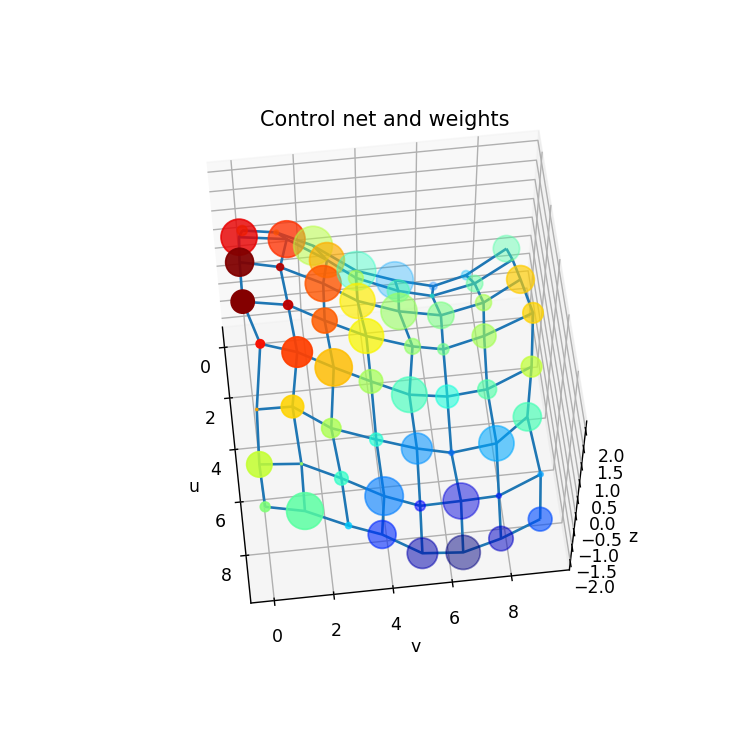

Text(0.5,0.92,'Control net and weights')

In [13]:
fig = plt.figure("Control points 3D", figsize=(6,6))

ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(pu,pv,pz)
ax.scatter3D(pu,pv,pz, c=pz.flatten(), s=(w**2.0)*500, cmap="jet")
ax.set_xlabel("u")
ax.set_ylabel("v")
ax.set_zlabel("z")
ax.set_title("Control net and weights")

<IPython.core.display.Javascript object>


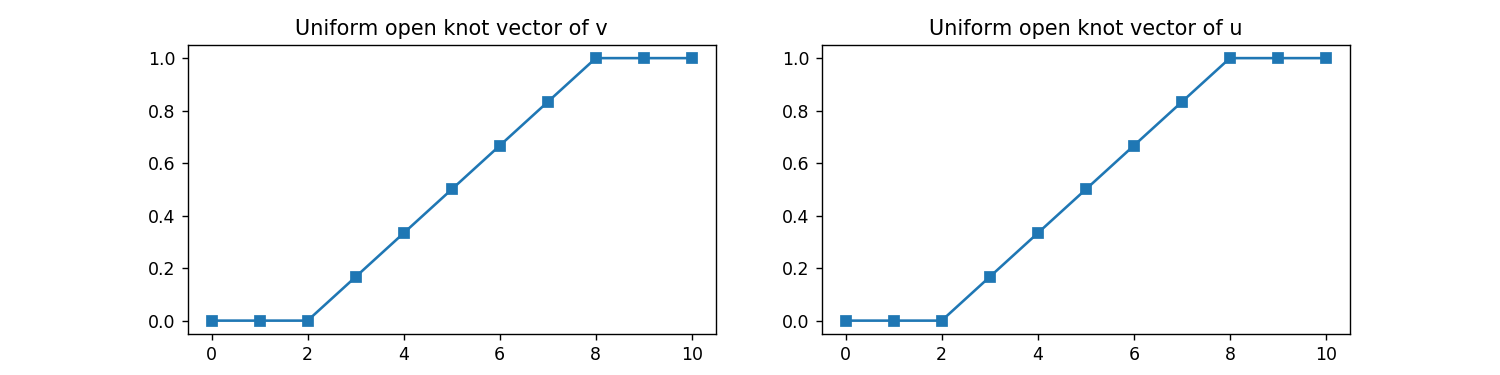

In [14]:
fig = plt.figure("U-V knot vector", figsize=(12,3))
v = open_uniform_vector(mv + m + 1, m)
u = open_uniform_vector(mu + n + 1, n)
plt.subplot(121)
plt.title("Uniform open knot vector of v")
plt.plot(v, "-s")
plt.subplot(122)
plt.title("Uniform open knot vector of u")
plt.plot(u, "-s")

In [15]:
tx = np.linspace(0.0, u[-1], int(u[-1]/0.04))  
ty = np.linspace(0.0, v[-1], int(v[-1]/0.04))  
mx, my = np.meshgrid(tx, ty)
mx = mx.flatten()
my = my.flatten()
S = np.array([
    mx, 
    my,
    np.zeros(len(mx))
])

ind = 0
for s in S.T:      
    val = 0    
    uv_ind = 0
    
    NpnNqm = 0.0
    w_ind = 0
    for j in range(mv): # u-control point
        for i in range(mu): # v-control point
            Nuin = basic_function(u, i, n, s[0] )
            Nvjm = basic_function(v, j, m, s[1] )               
            NpnNqm = NpnNqm + Nuin * Nvjm * w[w_ind]
            w_ind += 1
            
    w_ind = 0
    for j in range(mv): # u-control point
        for i in range(mu): # v-control point
            Nuin = basic_function(u, i, n, s[0] )
            Nvjm = basic_function(v, j, m, s[1] )
            
            if NpnNqm != 0: # TODO: NqnNqmがゼロになるのはどんなとき？
                Rij = Nuin * Nvjm * w[w_ind] / NpnNqm
            else:
                Rij = 0
                
            val += Rij * Puv[:, uv_ind]
            uv_ind += 1
            w_ind += 1         
            
    if val.sum() == 0:
        S[:, ind] = None   # TODO: uとvの最初でvalが0となる。1次元のときは制御点を代入していたが、簡単のため除外 
    else:
        S[:, ind] = val
    ind += 1

<IPython.core.display.Javascript object>


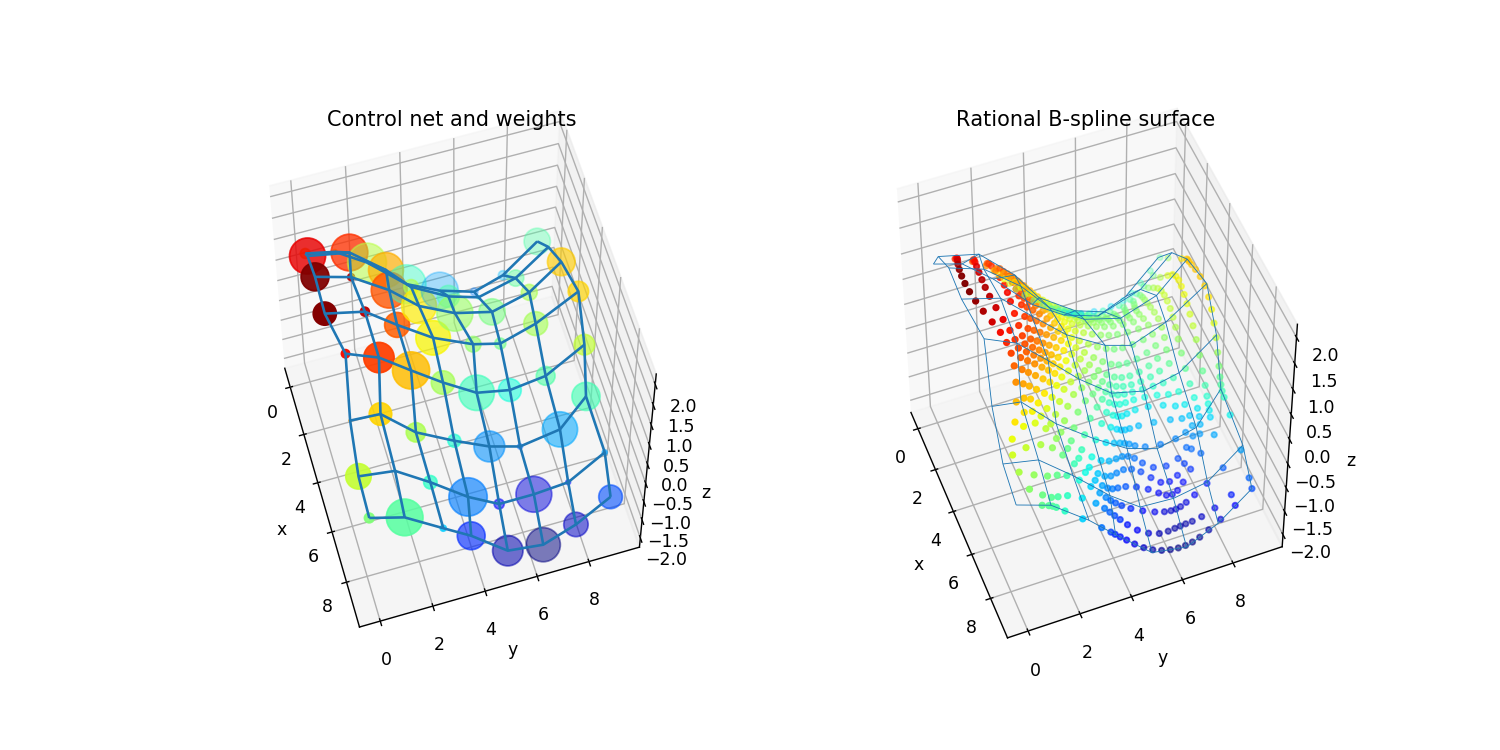

Text(0.5,0.92,'Rational B-spline surface')

In [16]:
fig = plt.figure("B-spline 2D", figsize=(12,6))
ax = fig.add_subplot(121, projection='3d')
ax.scatter3D(Puv[0,:], Puv[1,:], Puv[2,:], c = pz.flatten(), s=(w**2.0)*500, cmap="jet")
ax.plot_wireframe(pu,pv,pz)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Control net and weights")

ax = fig.add_subplot(122, projection='3d')
# ax.scatter3D(Puv[0,:], Puv[1,:], Puv[2,:], c = "gray",alpha=0.2, s=(w**2.0)*500)
ax.plot_wireframe(pu,pv,pz, linewidth=0.5)
ax.scatter3D(S[0,:], S[1,:], S[2,:], c=S[2,:], s=10, cmap="jet")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Rational B-spline surface")